In [4]:
using AbstractAlgebra, Random
using AbstractAlgebra: lift
b=3
F = GF(b)
m = 3
s = 2
ρ = m 
t = m - ρ 
N = b^m

27

In [2]:
using CairoMakie

In [5]:
S = matrix_space(F, m, m)

Matrix space of 3 rows and 3 columns
  over finite field F_3

Point generation digital and reduced digital nets

In [6]:
badic = collect(Iterators.product(fill(0:b-1, m)...))[:]

27-element Vector{Tuple{Int64, Int64, Int64}}:
 (0, 0, 0)
 (1, 0, 0)
 (2, 0, 0)
 (0, 1, 0)
 (1, 1, 0)
 (2, 1, 0)
 (0, 2, 0)
 (1, 2, 0)
 (2, 2, 0)
 (0, 0, 1)
 ⋮
 (0, 0, 2)
 (1, 0, 2)
 (2, 0, 2)
 (0, 1, 2)
 (1, 1, 2)
 (2, 1, 2)
 (0, 2, 2)
 (1, 2, 2)
 (2, 2, 2)

In [7]:
function norm_coord(v,b)
    v_1 = 0.0
    bf = float(b)
    for i in eachindex(v)
        v_1 += v[i] * bf^(-i)
    end
    return v_1
end


norm_coord (generic function with 1 method)

In [8]:
using Test
@test norm_coord([1 1 0 1],2) == 13/16

Test Passed

In [5]:
# norm_coord( AbstractAlgebra.lift.( C_2*collect(badic[4]) ),2)  # you need to convert Tuples to vectors matrix mult...
# C_r2*collect(badic[4])

# If you compute in a finite field, you need to apply the map from Fq to R to make this computation
# work. This map is called 'lift'. So, you need to apply lift to the vector you want to compute with.

In [9]:
function point_gen(C,n,b)
    v = [norm_coord(AbstractAlgebra.lift.(c*n),b) for c in C]   
    return v
end

point_gen (generic function with 1 method)

In [40]:
C_1 = [1 1 0;0 0 2; 2 1 0]
C_2 = [2 1 0; 0 0 2; 1 1 0]
C_3 = [0 0 2; 2 1 0; 1 1 0]
C_1, C_2 , C_3 = S(C_1), S(C_2), S(C_3)
C = [C_1,C_3]

2-element Vector{AbstractAlgebra.Generic.MatSpaceElem{AbstractAlgebra.GFElem{Int64}}}:
 [1 1 0; 0 0 2; 2 1 0]
 [0 0 2; 2 1 0; 1 1 0]

In [11]:
point_gen(C,collect(badic[8]),3)

2-element Vector{BigFloat}:
 0.037037037037037041919962376823605154640972614288330078125
 0.333333333333333314829616256247390992939472198486328125

In [24]:
K_1 = (inv(C_1)*(C_1))

[1   0   0]
[0   1   0]
[0   0   1]

In [26]:
K_2 = inv(C_1)*(C_2)

[2   0   0]
[0   1   0]
[0   0   1]

In [27]:
K_2_l = (C_2)*inv(C_1)

[0   0   1]
[0   1   0]
[1   0   0]

In [28]:
K_3 = inv(C_1)*(C_3)

[1   1   1]
[2   2   1]
[1   2   0]

In [29]:
K_3_l = (C_3)*inv(C_1)

[0   1   0]
[0   0   1]
[1   0   0]

In [18]:
function gen_all_points(C,b)
    badic = collect(Iterators.product(fill(0:b-1, m)...))[:]
    pts = [point_gen(C,collect(n),b) for n in badic]
    return pts
end

gen_all_points (generic function with 1 method)

In [41]:
gen_all_points(C,b)
pts = gen_all_points(C,b)

27-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.40740740740740739866954100989460130222141742706298828125, 0.259259259259259251806373214321865816600620746612548828125]
 [0.703703703703703671579194889318387140519917011260986328125, 0.18518518518518518878313017239634064026176929473876953125]
 [0.370370370370370356749578633070996147580444812774658203125, 0.148148148148148146863167795572735485620796680450439453125]
 [0.66666666666666662965923251249478198587894439697265625, 0.07407407407407408383992475364721030928194522857666015625]
 [0.07407407407407408383992475364721030928194522857666015625, 0.22222222222222220988641083749826066195964813232421875]
 [0.74074074074074071349915726614199229516088962554931640625, 0.29629629629629629372633559114547097124159336090087890625]
 [0.037037037037037041919962376823605154640972614288330078125, 0.111111111111111104943205418749130330979824066162109375]
 [0.333333333333333314829616256247390992939472198486328125, 0.03703703703703704191996237682360515464

In [43]:
C_r1 = K_1
C_r2 = K_3_l

C_r = [C_r1,C_r2]

2-element Vector{AbstractAlgebra.Generic.MatSpaceElem{AbstractAlgebra.GFElem{Int64}}}:
 [1 0 0; 0 1 0; 0 0 1]
 [0 1 0; 0 0 1; 1 0 0]

In [44]:
gen_all_points(C_r,b)
pts_r = gen_all_points(C_r,b)

27-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.333333333333333314829616256247390992939472198486328125, 0.037037037037037041919962376823605154640972614288330078125]
 [0.66666666666666662965923251249478198587894439697265625, 0.07407407407407408383992475364721030928194522857666015625]
 [0.111111111111111104943205418749130330979824066162109375, 0.333333333333333314829616256247390992939472198486328125]
 [0.4444444444444444197728216749965213239192962646484375, 0.370370370370370356749578633070996147580444812774658203125]
 [0.777777777777777734602437931243912316858768463134765625, 0.40740740740740739866954100989460130222141742706298828125]
 [0.22222222222222220988641083749826066195964813232421875, 0.66666666666666662965923251249478198587894439697265625]
 [0.555555555555555524716027093745651654899120330810546875, 0.703703703703703671579194889318387140519917011260986328125]
 [0.888888888888888839545643349993042647838592529296875, 0.74074074074074071349915726614199229516088962554931640625]


In [38]:
set_theme!(theme_ggplot2())

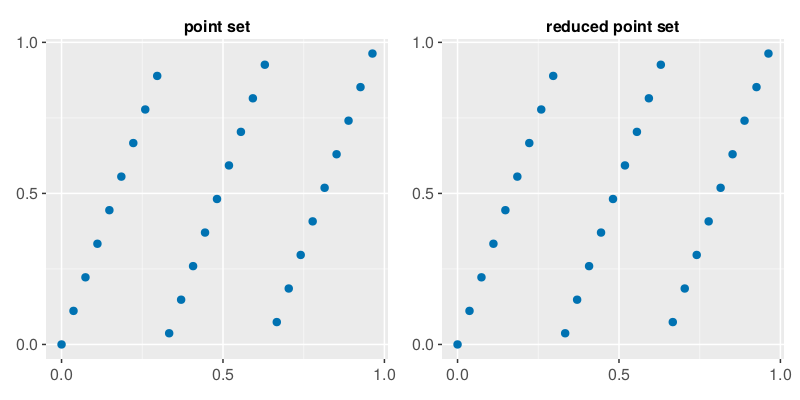

In [45]:
fig = Figure(resolution = (800, 400))
ax = Axis(fig[1,1], title = "point set")
scatter!( Point2.(pts) )

ax = Axis(fig[1,2], title = "reduced point set")
scatter!( Point2.(pts_r) )
fig

Computing the NRT-weight and Dual space

In [49]:
1+2^5+2^10+2^15

33825

In [19]:
dual_badic = collect(Iterators.product(fill(0:b-1, m*s)...))[:]

729-element Vector{NTuple{6, Int64}}:
 (0, 0, 0, 0, 0, 0)
 (1, 0, 0, 0, 0, 0)
 (2, 0, 0, 0, 0, 0)
 (0, 1, 0, 0, 0, 0)
 (1, 1, 0, 0, 0, 0)
 (2, 1, 0, 0, 0, 0)
 (0, 2, 0, 0, 0, 0)
 (1, 2, 0, 0, 0, 0)
 (2, 2, 0, 0, 0, 0)
 (0, 0, 1, 0, 0, 0)
 ⋮
 (0, 0, 2, 2, 2, 2)
 (1, 0, 2, 2, 2, 2)
 (2, 0, 2, 2, 2, 2)
 (0, 1, 2, 2, 2, 2)
 (1, 1, 2, 2, 2, 2)
 (2, 1, 2, 2, 2, 2)
 (0, 2, 2, 2, 2, 2)
 (1, 2, 2, 2, 2, 2)
 (2, 2, 2, 2, 2, 2)

In [20]:
function nrt_wt(v,m,s,b)
    wt = 0
    for i in 0:m:(m*s -1)
        for j in m:-1:1         #reverse(1:m)
            if v[i+j] != 0
                wt += j
                break
            end
        end
    end
    return wt
end

nrt_wt (generic function with 1 method)

In [21]:
nrt_wt.(dual_badic,3,2,3)

729-element Vector{Int64}:
 0
 1
 1
 2
 2
 2
 2
 2
 2
 3
 ⋮
 6
 6
 6
 6
 6
 6
 6
 6
 6

In [22]:
wt_dict = Dict()
    for x in dual_badic
        wt = nrt_wt(x,m,s,b)
        if haskey(wt_dict,wt)
            push!(wt_dict[wt],x)
        else 
            wt_dict[wt] = [x]
        end
    end 

In [23]:
function dual_C(M,b,m,s)
    dual_elt = []
    for n in dual_badic
        if transpose(collect(n))*M == [0 0 0] 
            dual_elt = push!(dual_elt, n)
        end
    end
    return dual_elt
end

dual_C (generic function with 1 method)

In [24]:
M = [C_1;C_2]
# transpose(collect(dual_badic[64]))*M == [0 0 0] 

6×3 Matrix{AbstractAlgebra.GFElem{Int64}}:
 1  1  1
 0  1  2
 0  0  1
 1  2  1
 0  1  1
 0  0  1

In [25]:
dual_pts = dual_C(M,3,3,2)

27-element Vector{Any}:
 (0, 0, 0, 0, 0, 0)
 (2, 2, 2, 1, 0, 0)
 (1, 1, 1, 2, 0, 0)
 (0, 2, 1, 0, 1, 0)
 (2, 1, 0, 1, 1, 0)
 (1, 0, 2, 2, 1, 0)
 (0, 1, 2, 0, 2, 0)
 (2, 0, 1, 1, 2, 0)
 (1, 2, 0, 2, 2, 0)
 (0, 0, 2, 0, 0, 1)
 ⋮
 (0, 0, 1, 0, 0, 2)
 (2, 2, 0, 1, 0, 2)
 (1, 1, 2, 2, 0, 2)
 (0, 2, 2, 0, 1, 2)
 (2, 1, 1, 1, 1, 2)
 (1, 0, 0, 2, 1, 2)
 (0, 1, 0, 0, 2, 2)
 (2, 0, 2, 1, 2, 2)
 (1, 2, 1, 2, 2, 2)

In [26]:
M_r = [C_r1; C_r2]

6×3 Matrix{AbstractAlgebra.GFElem{Int64}}:
 1  1  0
 0  1  0
 0  0  0
 1  2  0
 0  1  0
 0  0  0

In [27]:
dual_pts_r = dual_C(M_r,3,3,2)

81-element Vector{Any}:
 (0, 0, 0, 0, 0, 0)
 (0, 0, 1, 0, 0, 0)
 (0, 0, 2, 0, 0, 0)
 (2, 2, 0, 1, 0, 0)
 (2, 2, 1, 1, 0, 0)
 (2, 2, 2, 1, 0, 0)
 (1, 1, 0, 2, 0, 0)
 (1, 1, 1, 2, 0, 0)
 (1, 1, 2, 2, 0, 0)
 (0, 2, 0, 0, 1, 0)
 ⋮
 (0, 1, 0, 0, 2, 2)
 (0, 1, 1, 0, 2, 2)
 (0, 1, 2, 0, 2, 2)
 (2, 0, 0, 1, 2, 2)
 (2, 0, 1, 1, 2, 2)
 (2, 0, 2, 1, 2, 2)
 (1, 2, 0, 2, 2, 2)
 (1, 2, 1, 2, 2, 2)
 (1, 2, 2, 2, 2, 2)

In [28]:
wt_dict_dual = Dict()
    for x in dual_pts
        wt = nrt_wt(x,m,s,b)
        if haskey(wt_dict_dual,wt)
            push!(wt_dict_dual[wt],x)
        else 
            wt_dict_dual[wt] = [x]
        end
    end 

In [34]:
wt_dict_dual[4]

6-element Vector{NTuple{6, Int64}}:
 (2, 2, 2, 1, 0, 0)
 (1, 1, 1, 2, 0, 0)
 (2, 1, 0, 1, 1, 0)
 (1, 2, 0, 2, 2, 0)
 (2, 0, 0, 1, 2, 1)
 (1, 0, 0, 2, 1, 2)

In [30]:
wt_dict_dual_r = Dict()
    for x in dual_pts_r
        wt = nrt_wt(x,m,s,b)
        if haskey(wt_dict_dual_r,wt)
            push!(wt_dict_dual_r[wt],x)
        else 
            wt_dict_dual_r[wt] = [x]
        end
    end 

In [36]:
wt_dict_dual_r[4]

12-element Vector{NTuple{6, Int64}}:
 (2, 2, 1, 1, 0, 0)
 (2, 2, 2, 1, 0, 0)
 (1, 1, 1, 2, 0, 0)
 (1, 1, 2, 2, 0, 0)
 (0, 2, 0, 0, 1, 0)
 (2, 1, 0, 1, 1, 0)
 (0, 1, 0, 0, 2, 0)
 (1, 2, 0, 2, 2, 0)
 (1, 0, 0, 2, 1, 1)
 (2, 0, 0, 1, 2, 1)
 (1, 0, 0, 2, 1, 2)
 (2, 0, 0, 1, 2, 2)